# Colorectal Cancer Risk & Survival Prediction

## Objective
The goal of this project is to predict the **survival status** of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of **colorectal cancer patients**, with features related to risk factors, treatment, and outcomes.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for survival.
4. **Model Training**: Train a classification model to predict survival status.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [155]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [156]:

# 1. Load the dataset
df = pd.read_csv('/Users/nikhilreddyponnala/Desktop/Data Analytics/Third Project/Colorectal Cancer Risk & Survival Data/Dataset/colorectal_cancer_prediction.csv')

# Display basic information about the dataset

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (89945, 30)
   Patient_ID  Age  Gender   Race         Region Urban_or_Rural  \
0           1   71    Male  Other         Europe          Urban   
1           2   34  Female  Black  North America          Urban   
2           3   80  Female  White  North America          Urban   
3           4   40    Male  Black  North America          Rural   
4           5   43  Female  White         Europe          Urban   

  Socioeconomic_Status Family_History Previous_Cancer_History  \
0               Middle            Yes                      No   
1               Middle             No                      No   
2               Middle             No                      No   
3                  Low             No                      No   
4                 High            Yes                      No   

  Stage_at_Diagnosis  ... Insurance_Coverage Time_to_Diagnosis  \
0                III  ...                Yes           Delayed   
1                  I  ...                 No   

In [157]:
# Show dataset shape
print("Shape of dataset:", df.shape)



Shape of dataset: (89945, 30)


In [158]:
# Show first few rows
print("\nPreview of data:")
print(df.head())


Preview of data:
   Patient_ID  Age  Gender   Race         Region Urban_or_Rural  \
0           1   71    Male  Other         Europe          Urban   
1           2   34  Female  Black  North America          Urban   
2           3   80  Female  White  North America          Urban   
3           4   40    Male  Black  North America          Rural   
4           5   43  Female  White         Europe          Urban   

  Socioeconomic_Status Family_History Previous_Cancer_History  \
0               Middle            Yes                      No   
1               Middle             No                      No   
2               Middle             No                      No   
3                  Low             No                      No   
4                 High            Yes                      No   

  Stage_at_Diagnosis  ... Insurance_Coverage Time_to_Diagnosis  \
0                III  ...                Yes           Delayed   
1                  I  ...                 No            

In [159]:
# Data types and non-null counts
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI            

In [160]:
# Summary statistics (numeric features only)
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         Patient_ID           Age           BMI  Time_to_Recurrence
count  89945.000000  89945.000000  89945.000000        89945.000000
mean   44973.000000     54.332892     29.268105           29.543299
std    25965.029318     20.182220      6.211668           17.268440
min        1.000000     20.000000     18.500000            0.000000
25%    22487.000000     37.000000     23.900000           15.000000
50%    44973.000000     54.000000     29.300000           30.000000
75%    67459.000000     72.000000     34.600000           44.000000
max    89945.000000     89.000000     40.000000           59.000000


In [161]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [163]:
# 2. Data Exploration
print("\nTarget distribution (Survival_Status):")
print(df['Survival_Status'].value_counts())


Target distribution (Survival_Status):
Survival_Status
Survived    67341
Deceased    22604
Name: count, dtype: int64


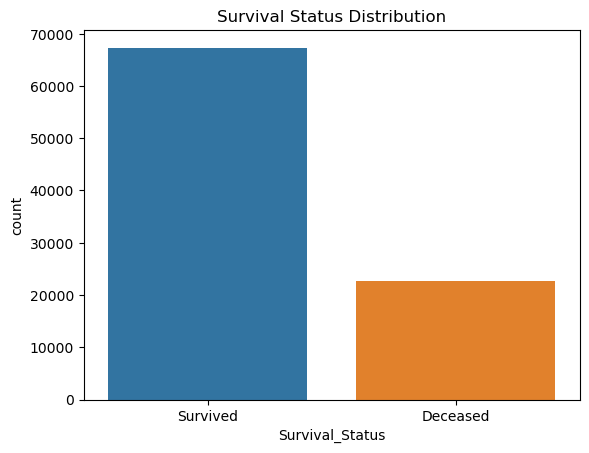

In [164]:
# Quick visualization
sns.countplot(x="Survival_Status", data=df)
plt.title("Survival Status Distribution")
plt.show()

Missing values per column:
Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


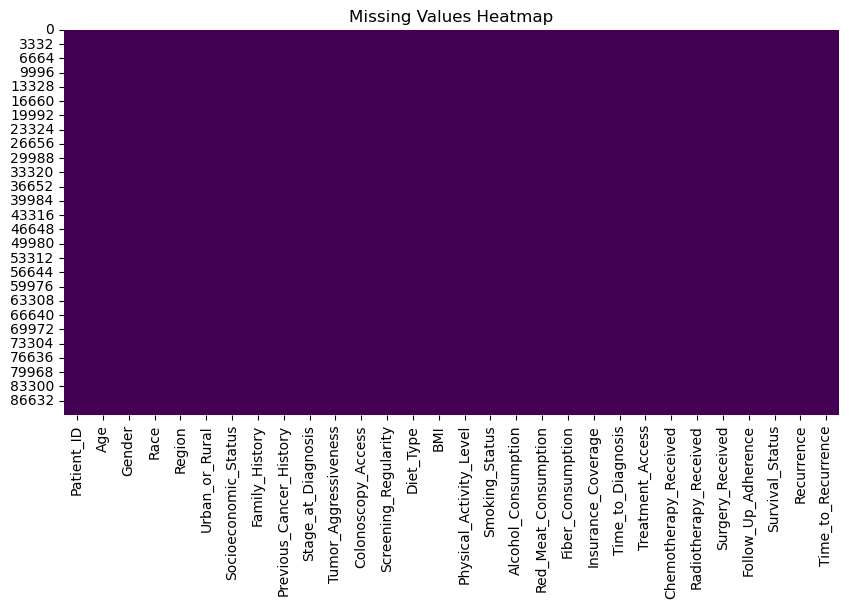

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Check for missing values ---
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()




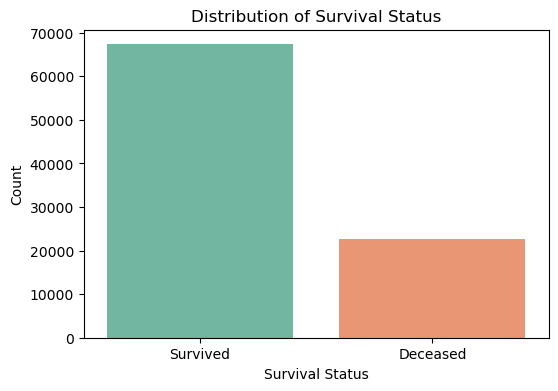

In [166]:
# --- Visualize survival status distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x="Survival_Status", data=df, palette="Set2")
plt.title("Distribution of Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()

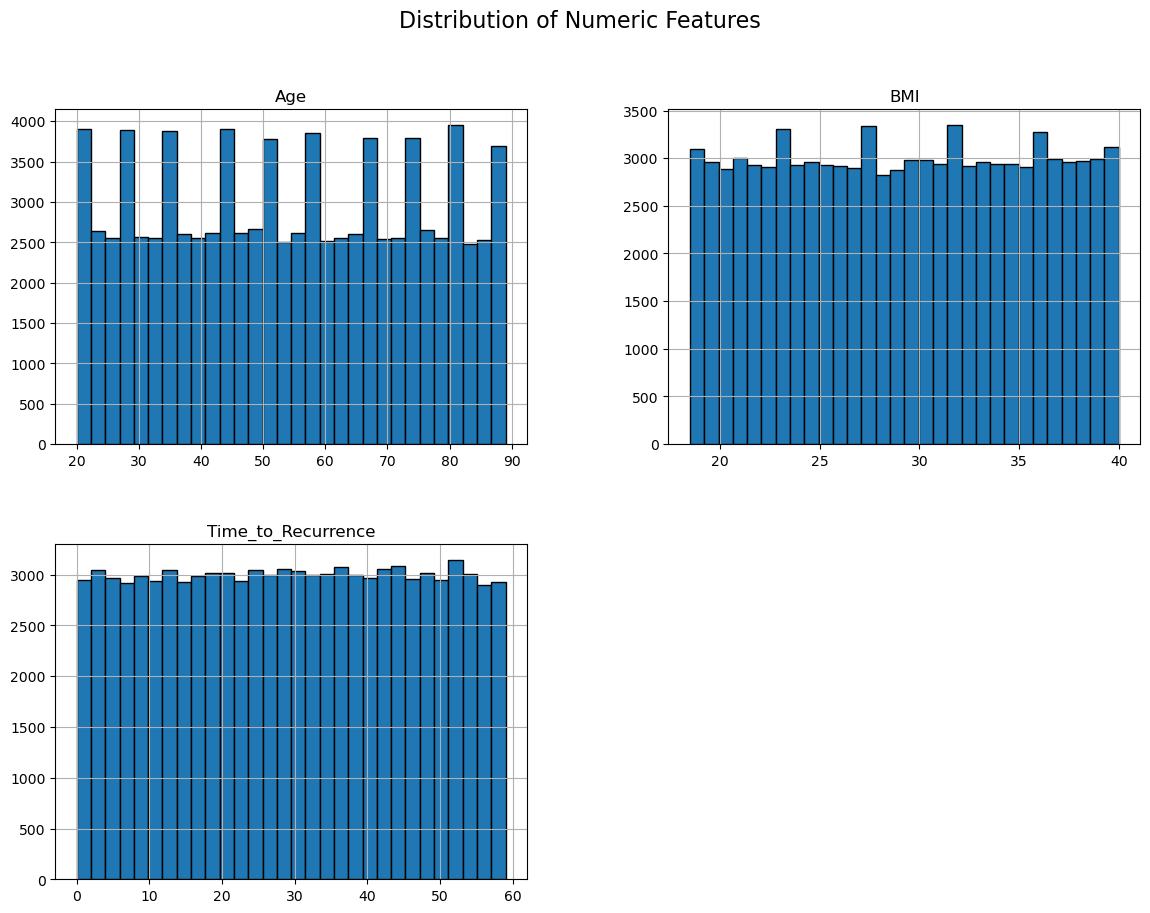

In [167]:
# --- Visualize key numerical distributions ---
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c not in ["Patient_ID"]]  # drop ID
df[num_cols].hist(figsize=(14,10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

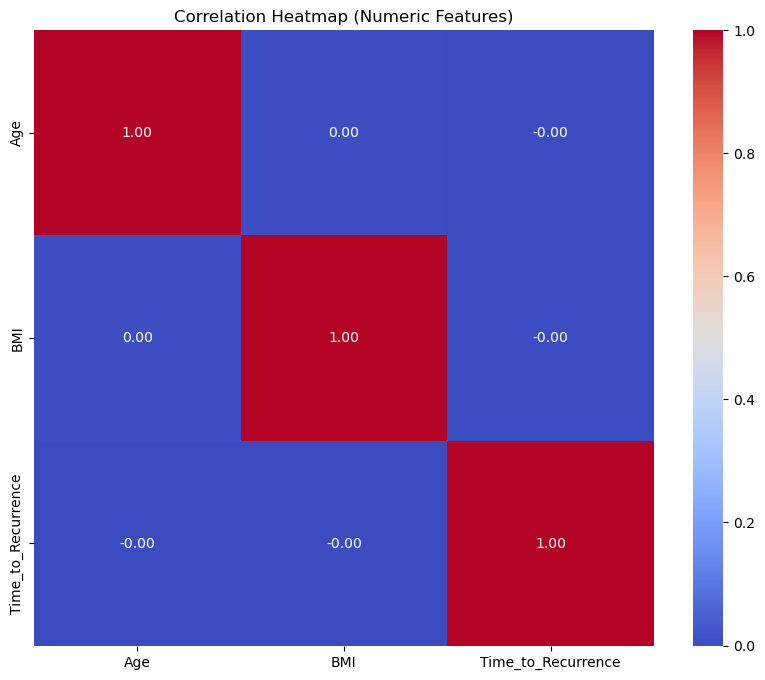

In [168]:
# Correlation heatmap (numerical features only)

plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [170]:
# 3. Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features & target
X = df.drop(columns=['Survival_Status', 'Patient_ID'])  # drop target & ID
y = df['Survival_Status']

# Identify categorical & numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

Categorical: ['Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity', 'Diet_Type', 'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption', 'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received', 'Follow_Up_Adherence', 'Recurrence']
Numeric: ['Age', 'BMI', 'Time_to_Recurrence']


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [172]:
# --- Drop unnecessary columns ---
# Drop unnecessary columns (e.g., Patient ID if present)

if "Patient_ID" in df.columns:
    df = df.drop(columns=["Patient_ID"])

In [173]:
# --- Define features (X) and target (y) ---
# Adjust target column name if different
target_col = "Survival_Status"
X = df.drop(columns=[target_col])
y = df[target_col]

In [174]:
# --- Identify column types ---
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity', 'Diet_Type', 'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption', 'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received', 'Follow_Up_Adherence', 'Recurrence']
Numerical columns: ['Age', 'BMI', 'Time_to_Recurrence']


In [175]:
# --- Preprocessing pipelines ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [176]:
# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [177]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (71956, 28)
Test set shape: (17989, 28)


## Model Training
Train a **Logistic Regression** model to predict patient survival.

In [179]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'Time_to_Recurrence']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Race', 'Region...
                                                   'Diet_Type',
                                                   'Physical_Activity_Level',
                                                   'Smoking_Status',
                                                   'Alcohol_Consumption',
                                                   'Red_Meat_Consumption',
                                                   'Fiber_Consumption',
                                                   'Insurance_Coverage',
                                                   'Time_to_Diagnosis',
                                                   'Treatment_Access',
                                                   'Chemotherapy_Received',
                                                   'Radiotherapy_Received',
                                                   'Surgery_Received',
                                                   'Follow_Up_Adherence',
                                                   'Recurrence'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [181]:
# Train a Logistic Regression model
# --- Define model pipeline (preprocessing + logistic regression) ---
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

In [182]:
# --- Train the model ---
clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'Time_to_Recurrence']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Race', 'Region...
                                                   'Physical_Activity_Level',
                                                   'Smoking_Status',
                                                   'Alcohol_Consumption',
                                                   'Red_Meat_Consumption',
                                                   'Fiber_Consumption',
                                                   'Insurance_Coverage',
                                                   'Time_to_Diagnosis',
                                                   'Treatment_Access',
                                                   'Chemotherapy_Received',
                                                   'Radiotherapy_Received',
                                                   'Surgery_Received',
                                                   'Follow_Up_Adherence',
                                                   'Recurrence'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [183]:
# --- Predictions ---
y_pred = clf.predict(X_test)



In [184]:
# --- Model evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.5060314636722442

Classification Report:
               precision    recall  f1-score   support

    Deceased       0.26      0.50      0.34      4521
    Survived       0.75      0.51      0.61     13468

    accuracy                           0.51     17989
   macro avg       0.50      0.51      0.47     17989
weighted avg       0.63      0.51      0.54     17989



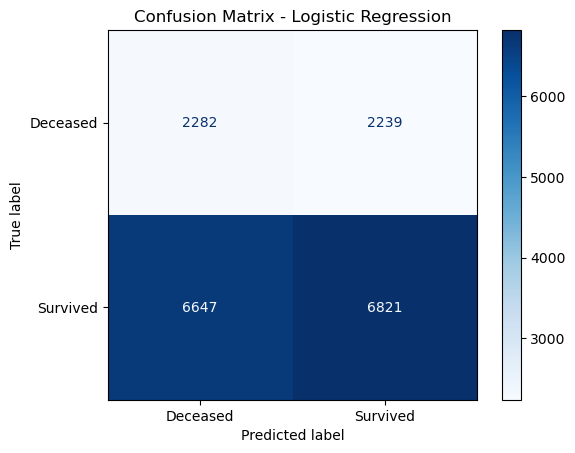

In [185]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [186]:
# 5. Evaluation
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.5060314636722442

Classification Report:
               precision    recall  f1-score   support

    Deceased       0.26      0.50      0.34      4521
    Survived       0.75      0.51      0.61     13468

    accuracy                           0.51     17989
   macro avg       0.50      0.51      0.47     17989
weighted avg       0.63      0.51      0.54     17989



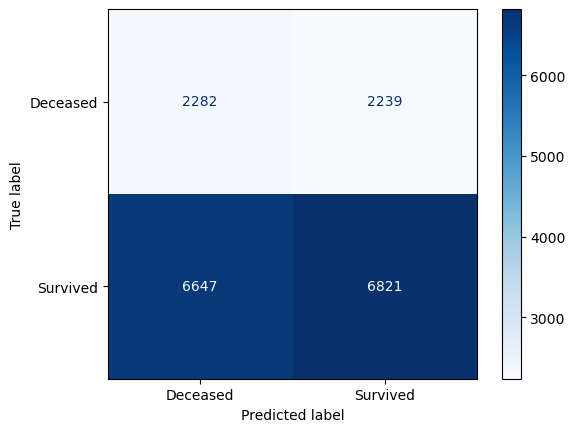

In [187]:
# Optional: confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.show()